# Introduction à la bibliothèque Matplotlib

Ces exemples sont tirés du chapitre du cours [Quelques modules d'intérêt en bioinformatique ](https://python.sdv.univ-paris-diderot.fr/17_modules_interet_bioinfo/#173-module-matplotlib)

Chargement d'un sous-module de la bibliothèque Matplotlib avec un alias

In [1]:
import matplotlib.pyplot as plt

Instruction spéciale pour afficher les images dans les notebooks Jupyter.

À ne charger qu'une seule fois par notebook (a priori plus nécessaire dans les dernières versions des notebooks).

In [3]:
%matplotlib inline

## Création d'un graphique simple

Text(0.5, 1.0, 'Concentration de produit en fonction du temps')

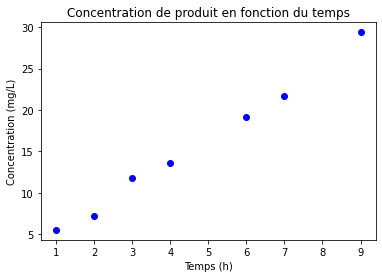

In [4]:
# Construction des données.
temps = [1, 2, 3, 4, 6, 7, 9]
concentration = [5.5, 7.2, 11.8, 13.6, 19.1, 21.7, 29.4]

# Affichage des points.
plt.scatter(temps, concentration, marker="o", color="blue")

# Affichage des étiquettes des axes.
plt.xlabel("Temps (h)")
plt.ylabel("Concentration (mg/L)")

# Affichage du titre.
plt.title("Concentration de produit en fonction du temps")

# La ligne suivante est pour un script uniquement.
# plt.show()

On souhaite ajouter le point 

- temps : 10 heures, concentration : 33,5 mg/L

au jeu de données puis générer un nouveau graphique avec comme titre *Concentration de glucose en fonction du temps*

Entrez votre code dans la cellule ci-dessous puis exécutez-la. Si vous sèchez, cliquez sur `↓ SOLUTION ↓`.

<details>
<summary>&darr; SOLUTION &darr;</summary>
Voici une proposition de réponse :

<pre>

# Modification des deux listes avec .append()
temps.append(10)
# Attention au . qui est le séparateur décimal en Python.
concentration.append(33.5)

# Affichage du graphique avec le nouveau titre
plt.scatter(temps, concentration, marker="o", color="blue")
plt.xlabel("Temps (h)")
plt.ylabel("Concentration (mg/L)")
plt.title("Concentration de glucose en fonction du temps")
</pre>

</details>

## Avec une droite et un export du graphique en plus

On utilise ici le module `numpy` qui permet de créer une liste (*array*) de valeurs :
```
x = np.linspace(min(temps), max(temps), 50)
```
Cet *array* pourra ensuite être manipulé directement dans une expression mathématique :
```
y = 2 + 3 * x
```
ce que les listes habituelles ne permettent pas.

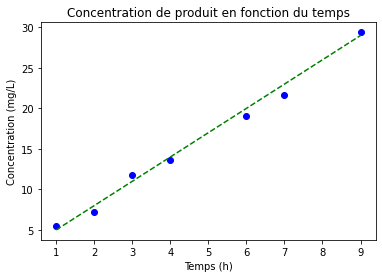

In [5]:
import numpy as np

x = np.linspace(min(temps), max(temps), 50)
y = 2 + 3 * x

# Affichage des points.
plt.scatter(temps, concentration, marker='o', color = 'blue')
plt.xlabel("Temps (h)")
plt.ylabel("Concentration (mg/L)")
plt.title("Concentration de produit en fonction du temps")

# Affichage de la droite.
plt.plot(x, y, color='green', ls="--")

# Export du graphique.
plt.savefig('concentration_vs_temps.png', bbox_inches='tight', dpi=200)

Remarquez que l'image créée apparait dans la liste des fichiers.

# Diagramme en bâtons

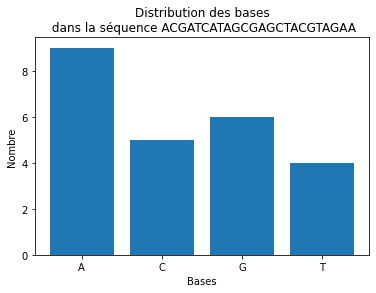

In [6]:
sequence = "ACGATCATAGCGAGCTACGTAGAA"
bases = ["A", "C", "G", "T"]

# Comptage du nombre de bases.
distribution = []
for base in bases:
    distribution.append(sequence.count(base))

# Construction du graphique.
x = list(range(len(bases)))
plt.bar(x, distribution)
plt.xticks(x, bases)
plt.xlabel("Bases")
plt.ylabel("Nombre")
plt.title("Distribution des bases\n dans la séquence {}".format(sequence))
plt.savefig('distribution_bases.png', bbox_inches="tight", dpi=200)

## La spirale

Résolvez l'exercice de la [spirale](https://python.sdv.univ-paris-diderot.fr/07_fichiers/#773-spirale-exercice) du chapitre sur les fichiers dans les cellules ci-dessous.

La première cellule est dédiée à la construction de la spirale et l'enregistrement des coordonnées dans un fichier. La seconde à l'affichage de cette spirale avec Matplotlib.

*Attendez un peu avant de cliquer sur ↓ SOLUTION ↓*

<details>
<summary>&darr; SOLUTION &darr;</summary>
Voici une proposition de réponse :

<pre>
import math
with open("spirale.dat", "w") as f_out:
    theta = 0
    rayon = 0.5
    # theta va de 0 à 4 pi, soit deux tours
    while theta < math.pi * 4:
        x = math.cos(theta) * rayon
        y = math.sin(theta) * rayon
        f_out.write("{:10.5f} {:10.5f}\n".format(x, y))
        # on incrémente l'angle theta et le rayon du cercle
        theta += 0.1
        rayon += 0.1
</pre>

</details>

<details>
<summary>&darr; SOLUTION &darr;</summary>
Voici une proposition de réponse :

<pre>
# On ne charge pas le module matplotlib,
# car il a déjà été chargé au début du notebook.

x = []
y = []
with open("spirale.dat", "r") as f_in:
    for line in f_in:
        coords = line.split()
        x.append(float(coords[0]))
        y.append(float(coords[1]))

plt.figure(figsize=(8,8))
mini = min(x+y) * 1.2
maxi = max(x+y) * 1.2
plt.xlim(mini, maxi)
plt.ylim(mini, maxi)
plt.plot(x, y)
plt.savefig("spirale.png")
</pre>

</details>

Proposez maintenant une solution qui, dans une unique cellule, n'utilise plus de fichier pour stocker les données, mais construit quand même le graphique.

<details>
<summary>&darr; SOLUTION &darr;</summary>
Voici une proposition de réponse :

<pre>
import math

x = []
y = []

theta = 0
rayon = 0.5

# theta va de 0 à 4 pi, soit deux tours
while theta < math.pi * 4:
    x.append(math.cos(theta) * rayon)
    y.append(math.sin(theta) * rayon)
    # on incrémente l'angle theta et le rayon du cercle
    theta += 0.1
    rayon += 0.1

plt.figure(figsize=(8,8))
mini = min(x+y) * 1.2
maxi = max(x+y) * 1.2
plt.xlim(mini, maxi)
plt.ylim(mini, maxi)
plt.plot(x, y)
plt.savefig("spirale.png")
</pre>

</details>

---

Bravo, vous avez fait vos premiers pas avec matplotlib. C'est une bibliothèque graphique très puissante qui permet de créer quasiment tout type de graphs.

Vous en aurez un rapide aperçu ici : [Matplotlib sample plots](https://matplotlib.org/tutorials/introductory/sample_plots.html). À chaque fois des exemples de codes sont fournis.

En 2019, Matplotlib a été mise à l'honneur car elle a été utilisée par les scientifiques pour produire la première image d'un trou noir :

![](black-hole.png)

[NumFOCUS tools help create the first ever image of a black hole](https://numfocus.org/case-studies/first-photograph-black-hole)

Voici quelques ressources supplémentaires si vous souhaitez approfondir ces possibilités :

- [Matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/), par Nicolas P. Rougier. Une référence !
- [Ten Simple Rules for Better Figures](https://doi.org/10.1371/journal.pcbi.1003833), Rougier *et al.*, 2014, PLOS Comput Biol

Enfin, d'autres modules comme [seaborn](https://seaborn.pydata.org/), [Bokeh](https://bokeh.pydata.org/en/latest/) ou [plotly](https://plot.ly/) permettent de générer des graphiques plus élégants ou interactifs.